# TP1 RN2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [4]:
from pprint import pprint

pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [5]:
newsgroups_train.target.shape

(11314,)

In [6]:
newsgroups_train.target[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [7]:
newsgroups_train.data[90]

"Organization: Penn State University\nFrom: <PCA103@psuvm.psu.edu>\nSubject: ATARI 2600 Processors\nLines: 12\n\nDoes anyone know what processor the Atari 2600 used? What I'm looking for is th\ne pin-outs for the Atari 2600.... the schematics for it it... does anyone have\nany idea where I could find this or any related information? This is very impor\ntant. Also, are the ROM chips that were used fo rthe 2600 games still available\n, or were they propreitary? Please email me with any responces, as this is very\n important.. Thanks a million...\n\nBTW- Anyone who works/has worked for Atari, I could really use your help with i\nnfo on the old 2600, please email me if you are willing to help me.... thatnks\nalot!!\n\n-Peter\n"

In [8]:
newsgroups_train.target_names[newsgroups_train.target[90]]

'sci.electronics'

## TFIDFVECTORIZER

TFIDF es una medida de originalidad de una palabra que se hace comparando el número de veces que una palabra aparece en un documento con el número de documentos en lo que la palabra aparece.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), max_df=0.3, max_features=None, stop_words="english")
vectors_TFIDF = vectorizer.fit_transform(newsgroups_train.data)
vectors_TFIDF.shape

(11314, 129783)

In [10]:
vectors_TFIDF.nnz / float(vectors_TFIDF.shape[0])

107.63991514937246

`vectors` es una matriz esparsa de sci-py. Se puede ver que en promedio por documento se tienen 158 palabras "útiles".

## Count Vectorizer
Es más simple que TFIDF, anota la cantidad de veces que aparece una palabra en un documento

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1), max_df=0.8, min_df=2, max_features=None, stop_words="english")
vectors_CV = vectorizer.fit_transform(newsgroups_train.data)
vectors_CV.shape

(11314, 56123)

In [12]:
vectors_CV.nnz / float(vectors_CV.shape[0])

105.49770196217077

Ahora veamos dos documentos de electrónica pero distintos, y veamos su similaridad:


In [13]:
# Hago un diccionario para agrupar los articulos por categoria
articles_by_category = {}
indexes_by_category = {}

for i, category in enumerate(newsgroups_train.target_names):
    category_articles = [newsgroups_train.data[j] for j in range(len(newsgroups_train.data)) if newsgroups_train.target[j] == i]
    category_index = [j for j in range(len(newsgroups_train.data)) if newsgroups_train.target[j] == i]
    articles_by_category[category] = category_articles
    indexes_by_category[category] = category_index
articles_in_sci_space = articles_by_category['sci.electronics']


# Histogramas para TFIDF


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
matriz_similaridad = cosine_similarity(vectors_TFIDF)
print(matriz_similaridad)

[[1.         0.00625656 0.02992428 ... 0.00257245 0.00136056 0.01559633]
 [0.00625656 1.         0.02212173 ... 0.05620796 0.05012854 0.01225637]
 [0.02992428 0.02212173 1.         ... 0.00101159 0.01253057 0.01017505]
 ...
 [0.00257245 0.05620796 0.00101159 ... 1.         0.0019577  0.        ]
 [0.00136056 0.05012854 0.01253057 ... 0.0019577  1.         0.        ]
 [0.01559633 0.01225637 0.01017505 ... 0.         0.         1.        ]]


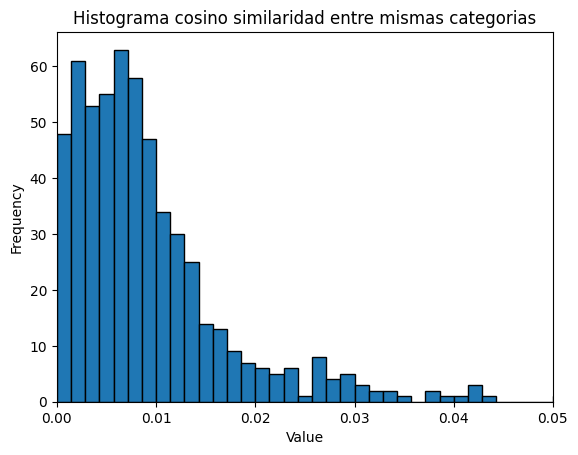

In [15]:
import matplotlib.pyplot as plt
same_category_similarity = [matriz_similaridad[indexes_by_category['sci.electronics'][1], j] for j in indexes_by_category['sci.electronics']]

plt.hist(same_category_similarity, bins=700, edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(0, 0.05)
plt.title('Histograma cosino similaridad entre mismas categorias')

plt.show()

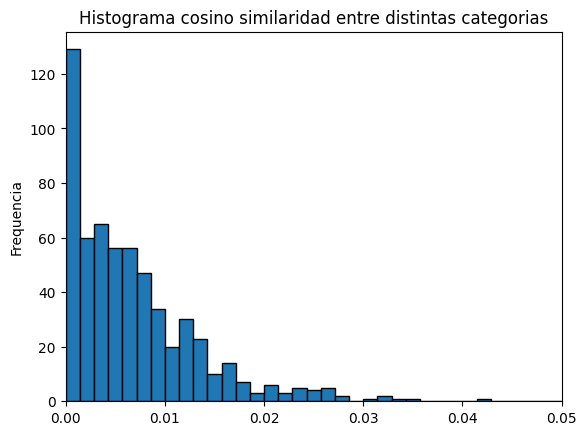

In [16]:
diff_category_similarity = [matriz_similaridad[indexes_by_category['sci.electronics'][0], j] for j in range(0, len(indexes_by_category['sci.electronics'])-1)]

plt.hist(diff_category_similarity, bins=700, edgecolor='black')

plt.ylabel('Frequencia')
plt.xlim(0, 0.05)
plt.title('Histograma cosino similaridad entre distintas categorias')

plt.show()

In [17]:
print(matriz_similaridad[0:5,0:5])

[[1.         0.00625656 0.02992428 0.00804248 0.01001545]
 [0.00625656 1.         0.02212173 0.00286199 0.        ]
 [0.02992428 0.02212173 1.         0.01786727 0.03786571]
 [0.00804248 0.00286199 0.01786727 1.         0.02405743]
 [0.01001545 0.         0.03786571 0.02405743 1.        ]]


# Histogramas para Count Vectorizer




In [18]:
matriz_similaridad = cosine_similarity(vectors_CV)
print(matriz_similaridad)

[[1.         0.1014475  0.1001336  ... 0.00796768 0.06253054 0.11152836]
 [0.1014475  1.         0.07449423 ... 0.05927546 0.12211366 0.11062845]
 [0.1001336  0.07449423 1.         ... 0.01404186 0.05510039 0.05823768]
 ...
 [0.00796768 0.05927546 0.01404186 ... 1.         0.00548046 0.        ]
 [0.06253054 0.12211366 0.05510039 ... 0.00548046 1.         0.05966583]
 [0.11152836 0.11062845 0.05823768 ... 0.         0.05966583 1.        ]]


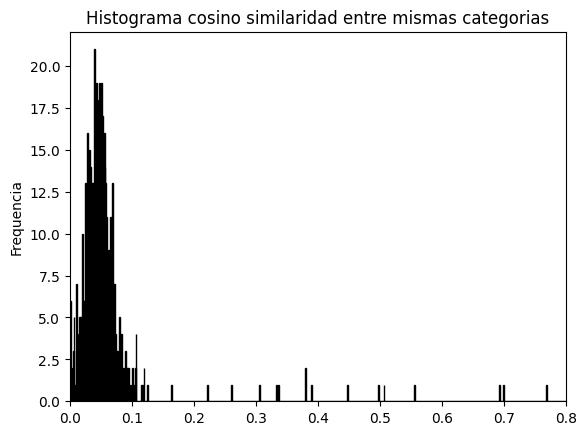

In [19]:
import matplotlib.pyplot as plt
same_category_similarity = [matriz_similaridad[indexes_by_category['sci.electronics'][1], j] for j in indexes_by_category['sci.electronics']]

plt.hist(same_category_similarity, bins=700, edgecolor='black')

plt.ylabel('Frequencia')
plt.xlim(0, 0.8)
plt.title('Histograma cosino similaridad entre mismas categorias')

plt.show()

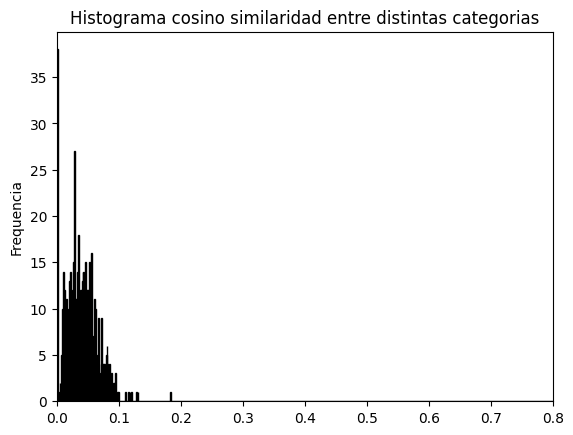

In [20]:
diff_category_similarity = [matriz_similaridad[indexes_by_category['sci.electronics'][0], j] for j in range(0, len(indexes_by_category['sci.electronics'])-1)]

plt.hist(diff_category_similarity, bins=700, edgecolor='black')

plt.ylabel('Frequencia')
plt.xlim(0, 0.8)
plt.title('Histograma cosino similaridad entre distintas categorias')

plt.show()

In [21]:
print(matriz_similaridad[0:5,0:5])

[[1.         0.1014475  0.1001336  0.0927837  0.07009996]
 [0.1014475  1.         0.07449423 0.07592891 0.07170728]
 [0.1001336  0.07449423 1.         0.09265991 0.11839324]
 [0.0927837  0.07592891 0.09265991 1.         0.14309095]
 [0.07009996 0.07170728 0.11839324 0.14309095 1.        ]]


# Reflexiones

De los histogramas anteriores, vemos que para artículos de la misma categoría, se muestra valor si similitud mayores. Aunque es importante entender este análisis presenta el sesgo que impone el artículo de referencia, ya que el mismo, aunque pertenezca al tópico "sci.electronics", puede que no haga muchas menciones a la temática.

# Truncated SVD

In [22]:
from sklearn.decomposition import TruncatedSVD

num_components = 500
svd = TruncatedSVD(n_components=num_components)
svd_matrix = svd.fit_transform(vectors_TFIDF)

print(svd_matrix.shape)


(11314, 500)


In [23]:
matriz_similaridad = cosine_similarity(svd_matrix)
print(matriz_similaridad)

[[ 1.          0.01110175  0.11037744 ...  0.04389108 -0.00152142
   0.07768943]
 [ 0.01110175  1.          0.07769072 ...  0.27232407  0.15736508
   0.02626895]
 [ 0.11037744  0.07769072  1.         ...  0.07593463  0.05623992
   0.03647576]
 ...
 [ 0.04389108  0.27232407  0.07593463 ...  1.          0.04850465
   0.02996314]
 [-0.00152142  0.15736508  0.05623992 ...  0.04850465  1.
   0.00739652]
 [ 0.07768943  0.02626895  0.03647576 ...  0.02996314  0.00739652
   1.        ]]


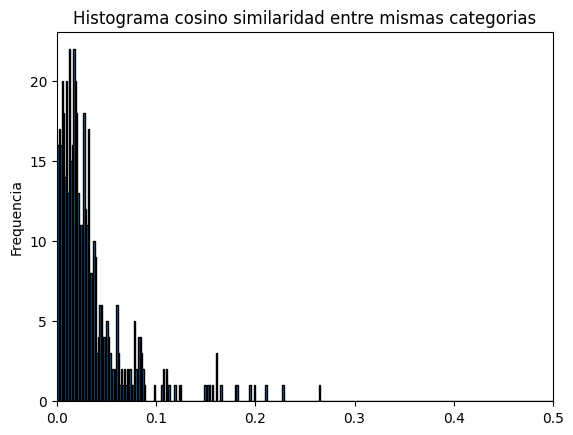

In [24]:
import matplotlib.pyplot as plt
same_category_similarity = [matriz_similaridad[indexes_by_category['sci.electronics'][1], j] for j in indexes_by_category['sci.electronics']]

plt.hist(same_category_similarity, bins=700, edgecolor='black')

plt.ylabel('Frequencia')
plt.xlim(0, 0.5)
plt.title('Histograma cosino similaridad entre mismas categorias')

plt.show()

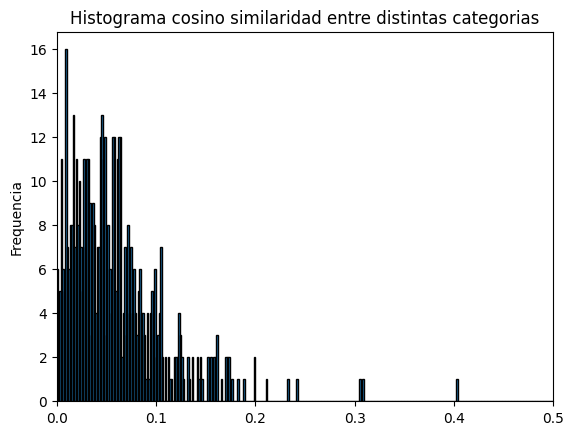

In [25]:
diff_category_similarity = [matriz_similaridad[indexes_by_category['sci.electronics'][0], j] for j in range(0, len(indexes_by_category['sci.electronics'])-1)]


plt.hist(diff_category_similarity, bins=700, edgecolor='black')

plt.ylabel('Frequencia')
plt.xlim(0, 0.5)
plt.title('Histograma cosino similaridad entre distintas categorias')

plt.show()

In [26]:
print(matriz_similaridad[0:5,0:5])

[[ 1.          0.01110175  0.11037744  0.04942559  0.02996918]
 [ 0.01110175  1.          0.07769072  0.00452715 -0.01891639]
 [ 0.11037744  0.07769072  1.          0.10357244  0.1264348 ]
 [ 0.04942559  0.00452715  0.10357244  1.          0.05835914]
 [ 0.02996918 -0.01891639  0.1264348   0.05835914  1.        ]]


Increiblemente dio peor con Truncated SVD ...

# Matriz término documento (la transpuesta)

In [27]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), min_df = 15,max_df=0.3, max_features=None, stop_words="english")
vectors_TFIDF = vectorizer.fit_transform(newsgroups_train.data)
transpose = vectors_TFIDF.T

In [28]:
cs_term_doc = cosine_similarity(transpose)

In [29]:
words = ['car', 'vehicle', 'transistor', 'resistor']
indices = [np.where(vectorizer.get_feature_names_out() == word)[0][0] for word in words]

print(cs_term_doc[indices[0], indices[1]])
print(cs_term_doc[indices[0], indices[2]])
print(cs_term_doc[indices[0], indices[3]])
print(cs_term_doc[indices[2], indices[3]])


0.11640868231948949
0.006155220185278661
0.0028004362733374476
0.15429659497304016


Dado que la matriz de cosine similariy de termino ocuparía 80GB, se agrego min_df = 15 para achicar mucho el vocabulario. Luego se evalua para las palabras en `words`, con resultados interesantes  

# Matriz término-clase

In [30]:
term_class = np.array([vectors_TFIDF[newsgroups_train.target == t, :].sum(axis=0) for t in range(20)])[:, 0, :]

similarity_term_class = cosine_similarity(term_class)

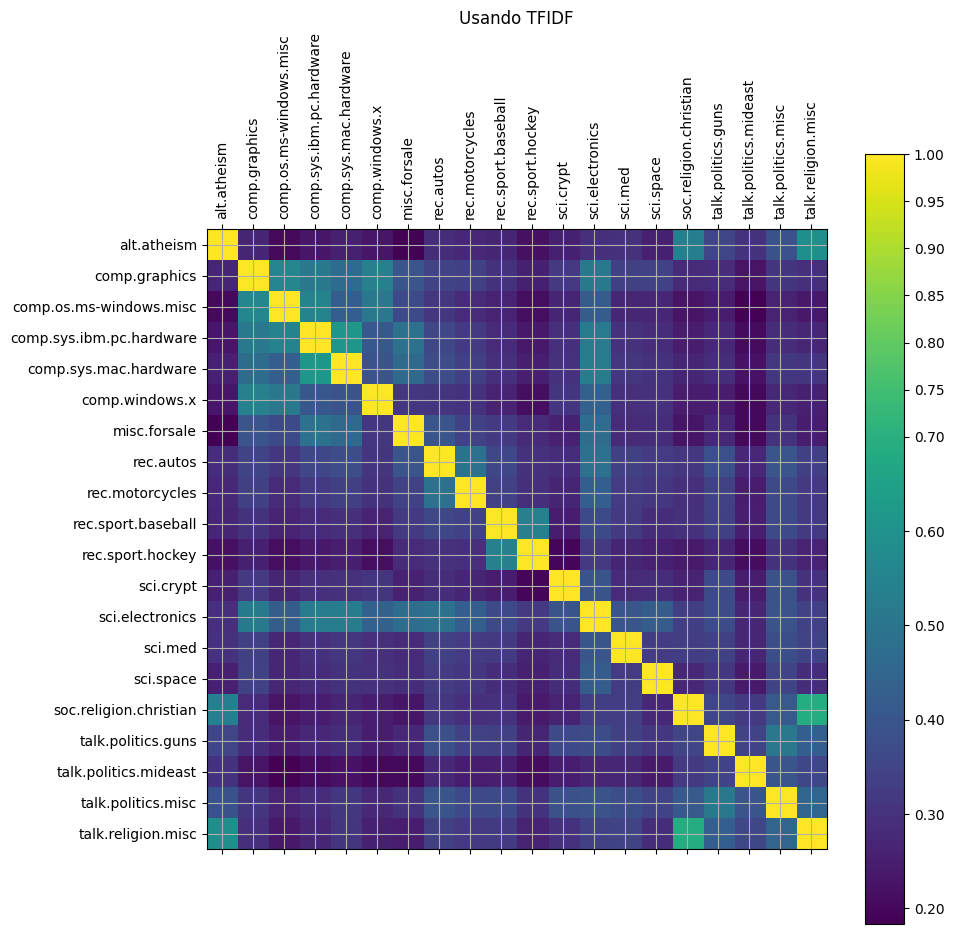

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(similarity_term_class, interpolation='nearest')
ax.grid(True)
plt.xticks(range(20), newsgroups_train.target_names, rotation=90);
plt.yticks(range(20), newsgroups_train.target_names);
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.title('Usando TFIDF')
plt.show()

In [32]:
term_class = np.array([vectors_CV[newsgroups_train.target == t, :].sum(axis=0) for t in range(20)])[:, 0, :]

similarity_term_class = cosine_similarity(term_class)

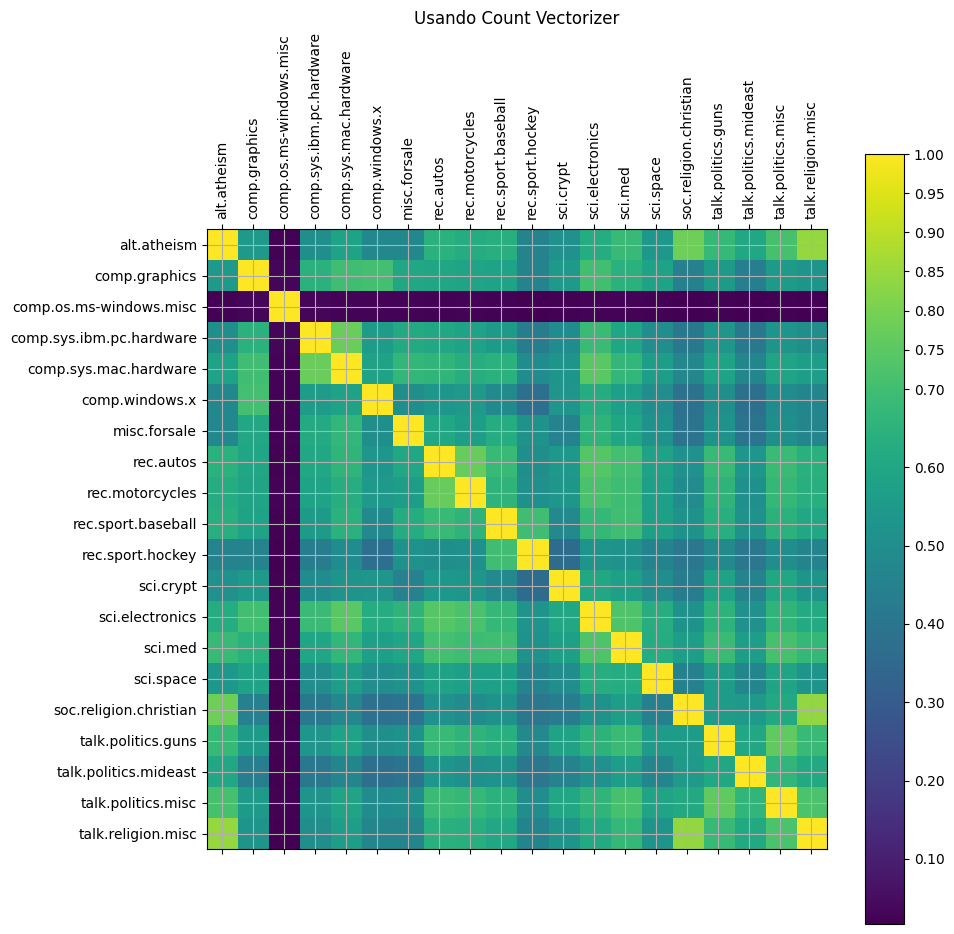

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(similarity_term_class, interpolation='nearest')
ax.grid(True)
plt.xticks(range(20), newsgroups_train.target_names, rotation=90);
plt.yticks(range(20), newsgroups_train.target_names);
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.title('Usando Count Vectorizer')
plt.show()

TFIDF parece performar mejor que countVectorizer


# Matriz término-término

In [16]:
from keras.preprocessing.sequence import make_sampling_table, skipgrams
from keras.preprocessing.text import Tokenizer

TNG_train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))


In [17]:
tokenizer = Tokenizer(num_words=10000)

In [18]:
tokenizer.fit_on_texts(TNG_train.data)

In [19]:
type(tokenizer.word_index)
for i, (key, value) in zip(range(0, 50), tokenizer.word_index.items()):
  print(f"'{key}':{value}")

'the':1
''ax':2
'to':3
'of':4
'a':5
'and':6
'i':7
'in':8
'is':9
'that':10
'it':11
'for':12
'you':13
'this':14
'on':15
'be':16
'are':17
'have':18
'with':19
'not':20
'as':21
'1':22
'or':23
'if':24
'but':25
'was':26
'they':27
'0':28
'2':29
'from':30
'by':31
'3':32
'at':33
''':34
'x':35
'm':36
'an':37
'can':38
'will':39
'all':40
'my':41
'one':42
'there':43
'what':44
'would':45
'do':46
'he':47
'we':48
'about':49
'q':50


In [20]:
seqs=tokenizer.texts_to_sequences(TNG_train.data)

In [21]:
seqs[0][0:10]

[7, 26, 1383, 24, 160, 64, 43, 105, 61, 15]

Entonces seqs, es una lista de listas, para cada documento de los 11314 que hay, se tiene una lista de indices, en los que cada índice hace referencia alguna palabra de las 10000 que hay en el diccionario.

In [22]:
len(seqs)

11314

In [23]:
flattened_list = [item for sublist in seqs for item in sublist]
print('Max val :',  max(flattened_list))
print('Min val :',  min(flattened_list))

Max val : 9999
Min val : 1


In [24]:
V = 10001

In [25]:
data, labels = skipgrams(sequence=seqs[0], vocabulary_size=V, window_size=5, negative_samples=0, sampling_table=make_sampling_table(V, sampling_factor=1e-5), shuffle=False)

In [26]:
len(data)

130

In [27]:
data

[[105, 1383],
 [105, 24],
 [105, 160],
 [105, 64],
 [105, 43],
 [105, 61],
 [105, 15],
 [105, 14],
 [105, 312],
 [105, 7],
 [1282, 262],
 [1282, 11],
 [1282, 26],
 [1282, 5],
 [1282, 29],
 [1282, 2507],
 [1282, 312],
 [1282, 986],
 [1282, 3],
 [1282, 16],
 [2507, 11],
 [2507, 26],
 [2507, 5],
 [2507, 29],
 [2507, 1282],
 [2507, 312],
 [2507, 986],
 [2507, 3],
 [2507, 16],
 [2507, 30],
 [1107, 3721],
 [1107, 68],
 [1107, 172],
 [1107, 408],
 [1107, 8],
 [1107, 1],
 [1107, 799],
 [1107, 7710],
 [1107, 26],
 [1107, 1604],
 [799, 172],
 [799, 408],
 [799, 8],
 [799, 1107],
 [799, 1],
 [799, 7710],
 [799, 26],
 [799, 1604],
 [799, 30],
 [799, 1],
 [7710, 408],
 [7710, 8],
 [7710, 1107],
 [7710, 1],
 [7710, 799],
 [7710, 26],
 [7710, 1604],
 [7710, 30],
 [7710, 1],
 [7710, 691],
 [1604, 1107],
 [1604, 1],
 [1604, 799],
 [1604, 7710],
 [1604, 26],
 [1604, 30],
 [1604, 1],
 [1604, 691],
 [1604, 4],
 [1604, 1],
 [691, 7710],
 [691, 26],
 [691, 1604],
 [691, 30],
 [691, 1],
 [691, 4],
 [691, 1],

## Ahora viene el skipgram aplicado a todos los documentos

In [43]:
seqs=np.hstack(seqs)
seqs.shape

seqs=seqs.astype(int)

pairs, labels = skipgrams(sequence=list(seqs), vocabulary_size=V, window_size=5, negative_samples=0, sampling_table=make_sampling_table(V, sampling_factor=1), shuffle=False)


In [44]:
pairs_u, counts = np.unique(pairs,return_counts=True, axis=0)


In [45]:
from scipy.sparse import csr_matrix,lil_matrix

counts_matrix=lil_matrix((V-1, V-1))

In [46]:
counts_matrix.shape

(10000, 10000)

In [47]:
for num,(pair,count) in enumerate(zip(pairs_u, counts)):
    if num%1000 ==0:
        print(f'\r{num}', end="")
    counts_matrix[pair[0],pair[1]] += count


4127000

# PPMI

In [48]:
PMI = counts_matrix[1:,1:].sum(axis=1)/counts_matrix[1:,1:].sum()

In [49]:
PMI.shape

(9999, 1)

In [50]:
probs = counts_matrix[1:,1:]/counts_matrix[1:,1:].sum()

In [51]:
PMI = probs/np.dot(PMI, PMI.T)

In [52]:
PMI

matrix([[ 1.06132649,  0.        ,  1.14312523, ...,  0.        ,
          0.        ,  0.12687849],
        [ 0.        , 28.2109273 ,  0.        , ...,  1.95644182,
          1.52167697,  1.30429455],
        [ 1.14706375,  0.        ,  0.87348793, ...,  0.        ,
          0.50696906,  0.        ],
        ...,
        [ 0.        ,  1.95644182,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  1.52167697,  0.50696906, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.12687849,  1.30429455,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [53]:
PMI=np.array(PMI)
PMI

array([[ 1.06132649,  0.        ,  1.14312523, ...,  0.        ,
         0.        ,  0.12687849],
       [ 0.        , 28.2109273 ,  0.        , ...,  1.95644182,
         1.52167697,  1.30429455],
       [ 1.14706375,  0.        ,  0.87348793, ...,  0.        ,
         0.50696906,  0.        ],
       ...,
       [ 0.        ,  1.95644182,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.52167697,  0.50696906, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12687849,  1.30429455,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [54]:
PMI=PMI*(PMI>1)+1e-8

In [55]:
PMI = np.log(PMI)

In [56]:
PMI=PMI*(PMI>0)+1e-8

In [57]:
PMI

array([[5.95195466e-02, 1.00000000e-08, 1.33765962e-01, ...,
        1.00000000e-08, 1.00000000e-08, 1.00000000e-08],
       [1.00000000e-08, 3.33970941e+00, 1.00000000e-08, ...,
        6.71127441e-01, 4.19813014e-01, 2.65662335e-01],
       [1.37205432e-01, 1.00000000e-08, 1.00000000e-08, ...,
        1.00000000e-08, 1.00000000e-08, 1.00000000e-08],
       ...,
       [1.00000000e-08, 6.71127441e-01, 1.00000000e-08, ...,
        1.00000000e-08, 1.00000000e-08, 1.00000000e-08],
       [1.00000000e-08, 4.19813014e-01, 1.00000000e-08, ...,
        1.00000000e-08, 1.00000000e-08, 1.00000000e-08],
       [1.00000000e-08, 2.65662335e-01, 1.00000000e-08, ...,
        1.00000000e-08, 1.00000000e-08, 1.00000000e-08]])